In [1]:
#importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a1ce4031d854453e9f411ca555e82d71 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Re8ZZdU5rsYicrMhX0XfBkUpFIBFnTl4gIk68nMo_lzv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a1ce4031d854453e9f411ca555e82d71.get_object(Bucket='myprojects-donotdelete-pr-z8xwgrjvbeicki',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_frame= pd.read_csv(body)
data_frame.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data_frame.shape

(30, 2)

In [4]:
#indexing or selection 
X = data_frame.iloc[:, 0:1].values
Y = data_frame.iloc[:,1].values

In [5]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

In [8]:
X_train,X_test


(array([[ 5.3],
        [ 7.9],
        [ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]), array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ]]))

In [9]:
Y_train,Y_test

(array([ 83088., 101302.,  56642.,  66029.,  64445.,  61111., 113812.,
         91738.,  46205., 121872.,  60150.,  39891.,  81363.,  93940.,
         57189.,  54445., 105582.,  43525.,  39343.,  98273.,  67938.,
         56957.]),
 array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
         55794.]))

In [10]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# Predicting the Test set results
y_pred = model.predict(X_test)

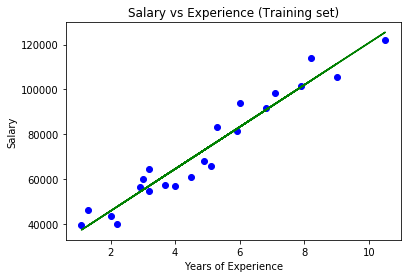

In [12]:
# Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'green')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

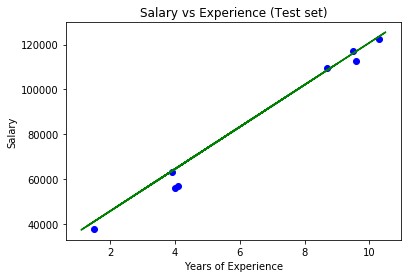

In [13]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'green')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
model.predict([[5]])

array([73885.24377647])